# Data Preparation

This notebook is used to prepare the dataset used for segmentation training. The dataset used for this project is the Figshare Brain Tumor dataset.

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

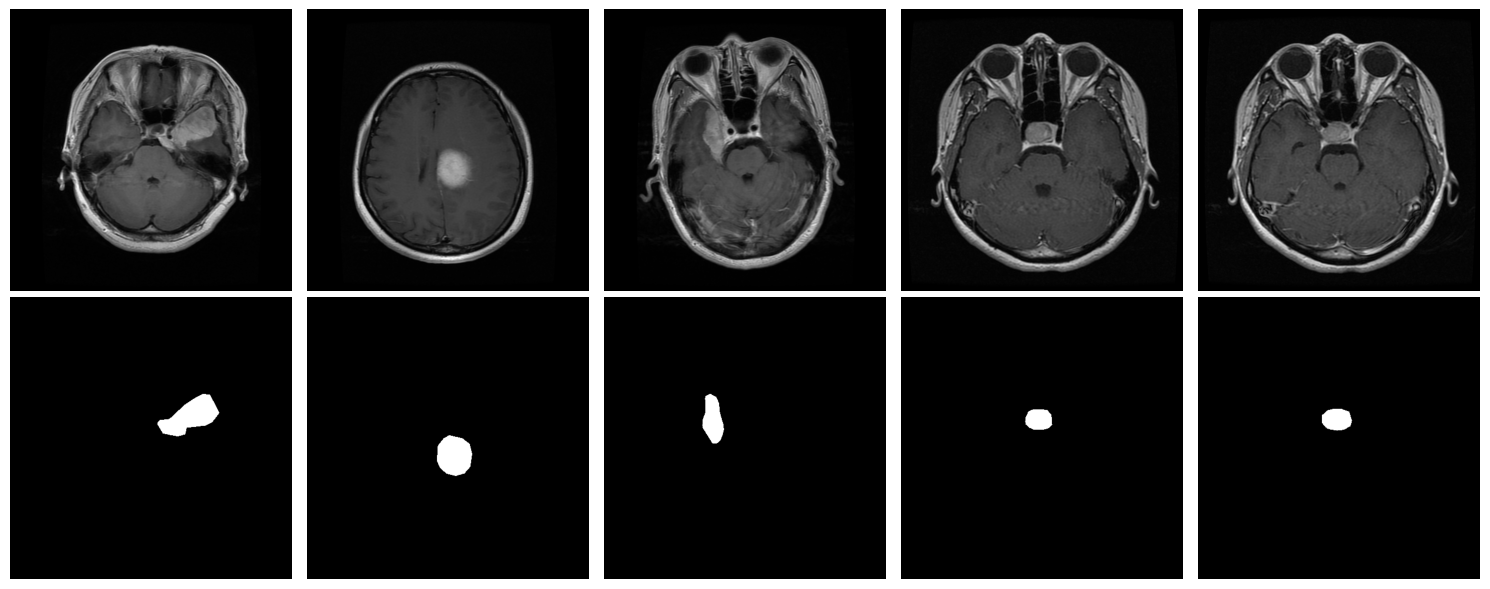

In [3]:
data_dir = "../data/images-figshare"

# List the .mat files (assuming they are named 1.mat, 2.mat, ..., 5.mat)
file_names = sorted([f for f in os.listdir(data_dir) if f.endswith(".mat")])[:5]

# Prepare figure
plt.figure(figsize=(15, 6))

for idx, file_name in enumerate(file_names):
    path = os.path.join(data_dir, file_name)
    data = h5py.File(path, "r")
    
    image = np.array(data["cjdata"]["image"]).T
    mask = np.array(data["cjdata"]["tumorMask"]).T

    # Top row: MRIs
    plt.subplot(2, 5, idx + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Bottom row: Masks
    plt.subplot(2, 5, idx + 6)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Sample Images

['cjdata']
['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


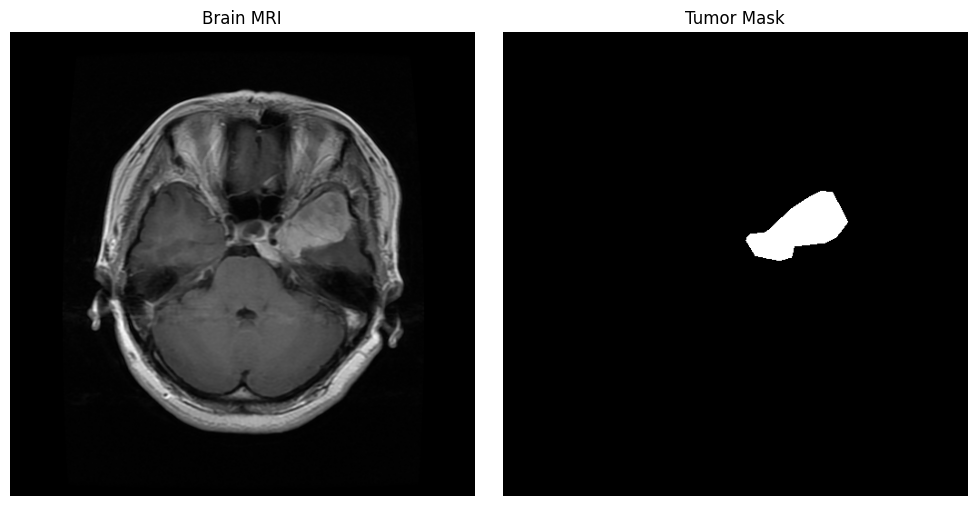

In [ ]:
IMAGE = "../data/images-figshare/1.mat"

data = h5py.File(IMAGE, "r")
print(list(data.keys()))
print(list(data["cjdata"].keys()))

image = np.array(data["cjdata"]["image"]).T 
mask = np.array(data["cjdata"]["tumorMask"]).T 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Brain MRI")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Tumor Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Dataset Conversion

In [ ]:
INPUT_DIR = Path("../data/images-figshare")
OUTPUT_IMAGE_DIR = Path("../data/converted/images")
OUTPUT_MASK_DIR = Path("../data/converted/masks")

OUTPUT_IMAGE_DIR.mkdir(parents = True, exist_ok = True)
OUTPUT_MASK_DIR.mkdir(parents = True, exist_ok = True)

In [5]:
mat_files = list(INPUT_DIR.glob("*.mat"))

for mat_file in mat_files:
    try:
        with h5py.File(mat_file, "r") as data:
            cjdata = data["cjdata"]

            image = np.array(cjdata["image"]).T
            image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
            image = Image.fromarray(image, mode="L")

            mask = np.array(cjdata["tumorMask"]).T
            mask = (mask > 0).astype(np.uint8) * 255
            mask_image = Image.fromarray(mask, mode="L")

            base_name = mat_file.stem
            image_path = OUTPUT_IMAGE_DIR / f"{base_name}.jpg"
            mask_path = OUTPUT_MASK_DIR / f"{base_name}.jpg"

            image.save(image_path)
            mask_image.save(mask_path)

            print(f"Saved: {image_path}, {mask_path}")

    except Exception as e:
        print(f"Error with {mat_file.name}: {e}")

Saved: ..\data\converted\images\1.jpg, ..\data\converted\masks\1.jpg
Saved: ..\data\converted\images\10.jpg, ..\data\converted\masks\10.jpg
Saved: ..\data\converted\images\100.jpg, ..\data\converted\masks\100.jpg
Saved: ..\data\converted\images\1000.jpg, ..\data\converted\masks\1000.jpg
Saved: ..\data\converted\images\1001.jpg, ..\data\converted\masks\1001.jpg
Saved: ..\data\converted\images\1002.jpg, ..\data\converted\masks\1002.jpg
Saved: ..\data\converted\images\1003.jpg, ..\data\converted\masks\1003.jpg
Saved: ..\data\converted\images\1004.jpg, ..\data\converted\masks\1004.jpg
Saved: ..\data\converted\images\1005.jpg, ..\data\converted\masks\1005.jpg
Saved: ..\data\converted\images\1006.jpg, ..\data\converted\masks\1006.jpg
Saved: ..\data\converted\images\1007.jpg, ..\data\converted\masks\1007.jpg
Saved: ..\data\converted\images\1008.jpg, ..\data\converted\masks\1008.jpg
Saved: ..\data\converted\images\1009.jpg, ..\data\converted\masks\1009.jpg
Saved: ..\data\converted\images\101.j

### Adding No-Tumor

Since the Figshare Brain Tumor dataset does not include a 'notumor' label, this section manually adds the 'notumor' category. A total of 500 'notumor' images are randomly selected from the Br35H and SARTAJ datasets. For these images, the corresponding masks are entirely black.

In [6]:
INPUT_NOTUMOR_DIR = Path("../data/images-notumor")
OUTPUT_IMAGE_DIR = Path("../data/converted/images")
OUTPUT_MASK_DIR = Path("../data/converted/masks")

OUTPUT_IMAGE_DIR.mkdir(parents = True, exist_ok = True)
OUTPUT_MASK_DIR.mkdir(parents = True, exist_ok = True)

In [7]:
notumor_files = list(INPUT_NOTUMOR_DIR.glob("*.jpg"))

for image_file in notumor_files:
    try:
        image = Image.open(image_file).convert("L")
        base_name = image_file.stem

        image_path = OUTPUT_IMAGE_DIR / f"{base_name}.jpg"
        image.save(image_path)

        width, height = image.size
        black_mask = Image.fromarray(np.zeros((height, width), dtype=np.uint8), mode="L")
        mask_path = OUTPUT_MASK_DIR / f"{base_name}.jpg"
        black_mask.save(mask_path)

        print(f"Saved notumor: {image_path}, {mask_path}")

    except Exception as e:
        print(f"Error processing {image_file.name}: {e}")

Saved notumor: ..\data\converted\images\Tr-no_0010.jpg, ..\data\converted\masks\Tr-no_0010.jpg
Saved notumor: ..\data\converted\images\Tr-no_0011.jpg, ..\data\converted\masks\Tr-no_0011.jpg
Saved notumor: ..\data\converted\images\Tr-no_0012.jpg, ..\data\converted\masks\Tr-no_0012.jpg
Saved notumor: ..\data\converted\images\Tr-no_0013.jpg, ..\data\converted\masks\Tr-no_0013.jpg
Saved notumor: ..\data\converted\images\Tr-no_0014.jpg, ..\data\converted\masks\Tr-no_0014.jpg
Saved notumor: ..\data\converted\images\Tr-no_0015.jpg, ..\data\converted\masks\Tr-no_0015.jpg
Saved notumor: ..\data\converted\images\Tr-no_0016.jpg, ..\data\converted\masks\Tr-no_0016.jpg
Saved notumor: ..\data\converted\images\Tr-no_0017.jpg, ..\data\converted\masks\Tr-no_0017.jpg
Saved notumor: ..\data\converted\images\Tr-no_0018.jpg, ..\data\converted\masks\Tr-no_0018.jpg
Saved notumor: ..\data\converted\images\Tr-no_0019.jpg, ..\data\converted\masks\Tr-no_0019.jpg
Saved notumor: ..\data\converted\images\Tr-no_0022